In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [55]:
data = pd.read_csv("train.csv")
data

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [56]:
data.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


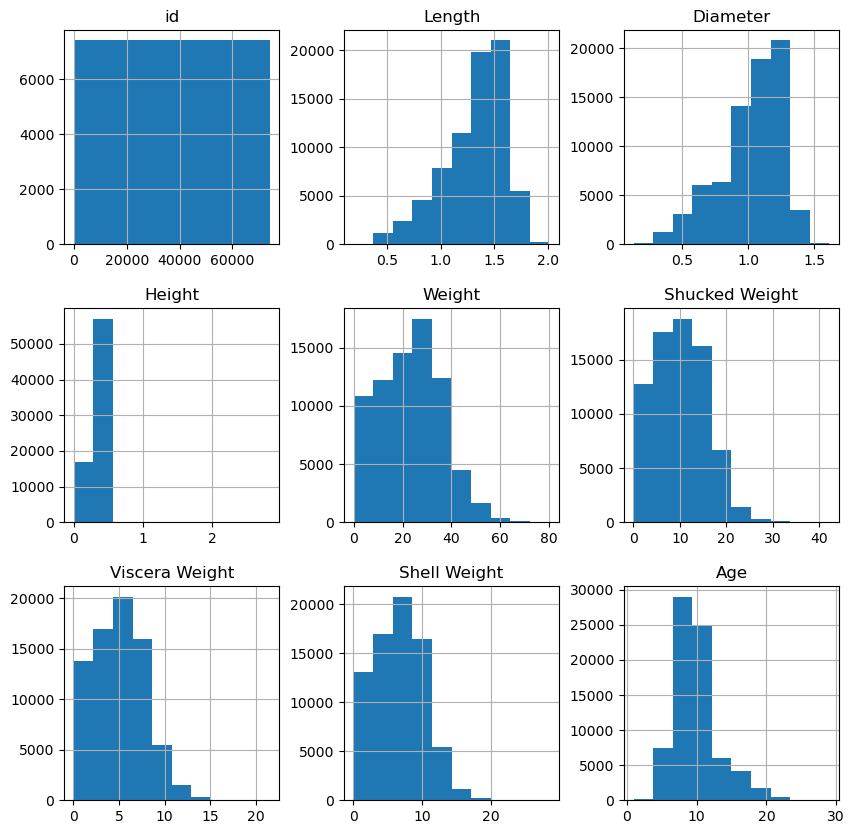

In [58]:
data.hist(figsize=(10,10));

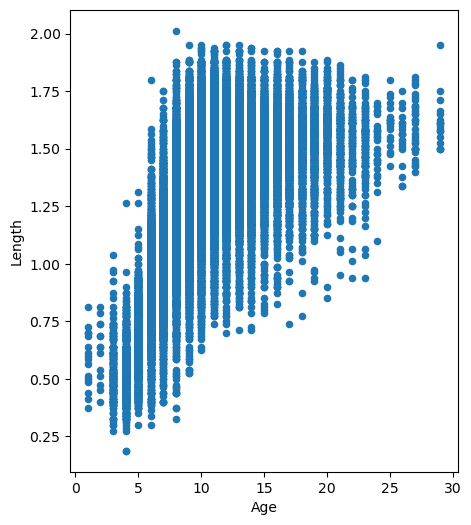

In [59]:
data.plot.scatter(x = "Age",y = "Length",figsize = (5,6));

In [60]:
data["Sex"] = data["Sex"].replace(["I","M","F"],[0,1,2])
data.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,0,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,2,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,0,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [62]:
X = data.drop("Age",axis=1)
y = data["Age"]

In [63]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [75]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
model_lr.score(X_valid,y_valid)

0.5545445554576067

In [76]:
model_rfr = RandomForestRegressor()
model_rfr.fit(X_train,y_train)
model_rfr.score(X_valid,y_valid)

0.569923504796424

In [77]:
show_scores(model_lr)

{'Training MAE': 1.4865138407332383,
 'Valid MAE': 1.489794566629197,
 'Training R^2': 0.5457427606464949,
 'Valid R^2': 0.5545445554576067}

In [78]:
show_scores(model_rfr)

{'Training MAE': 0.5430793382849426,
 'Valid MAE': 1.4605982040375396,
 'Training R^2': 0.9381647201938262,
 'Valid R^2': 0.569923504796424}

In [81]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                                                    param_distributions=rf_grid,
                                                    n_iter=2,
                                                    cv=5,
                                                    verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\EldorRa\Desktop\simple\project2\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\EldorRa\Desktop\simple\project2\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\EldorRa\Desktop\simple\project2\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [82]:
show_scores(rs_model)

{'Training MAE': 1.3246429644257747,
 'Valid MAE': 1.4154029149956535,
 'Training R^2': 0.632458298602526,
 'Valid R^2': 0.587761088891348}

In [83]:
test_data = pd.read_csv("test.csv")
test_data.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [85]:
test_data["Sex"] = test_data["Sex"].replace(["I","M","F"],[0,1,2])
test_data.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,0,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,0,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,2,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,2,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,0,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [88]:
test_preds = rs_model.predict(test_data)
test_preds

array([ 7.40447135,  7.76791167, 10.59683646, ..., 13.58332479,
        9.87361061, 12.4528574 ])

In [92]:
data_preds = pd.DataFrame()
data_preds["id"] = test_data["id"]
data_preds["Age"] = test_preds
data_preds.head()

,id,Age
0,74051,7.404471
1,74052,7.767912
2,74053,10.596836
3,74054,9.903760
4,74055,7.221285


In [93]:
data_preds.to_csv("test_preds.csv", index = False)